In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from os import path, listdir
from glob import glob
from wordcloud import WordCloud
from articles_preprocessing_for_word2vec import load_stop_words

In [2]:
# define original article destination
original_articles_destination = path.join('articles', 'original')
# create list of article source paths
media_sources_paths = glob(original_articles_destination + '/*/')

### Create dictionary of articles

In [3]:
# create a dictionary of dataframes per source
media_sources_articles = {}

for media_source in media_sources_paths:
    # extract media source name from path
    media_source_name = media_source[media_source.find('articles/original/')+len('articles/original/'):media_source.find('_articles/')]
    
    # list files in folder
    csv_files = listdir(media_source)
    
    merged_articles_df = pd.DataFrame(None)
    for csv_file in csv_files:
        media_source_df = pd.read_csv(media_source+csv_file)
        merged_articles_df = pd.concat([merged_articles_df, media_source_df], axis=0)
        
        
    media_sources_articles[media_source_name] = merged_articles_df.reset_index(drop=True)

### Merge all articles in a single dataframe

In [4]:
# create a merged dataframe
merged_articles_df = pd.DataFrame(None)
for media_source_name in media_sources_articles:
    media_sources_articles[media_source_name]['media_source_name'] = media_source_name
    merged_articles_df = pd.concat([merged_articles_df, media_sources_articles[media_source_name]], axis=0)

In [5]:
merged_articles_df.head(5)

,links,title,subtitle,main_text,tags,author,upload_time,update_time,media_source_name,index
0,https://www.kathimerini.gr/politics/1089226/f-...,Φ. Γεννηματά: Η σημερινή μέρα στιγματίζεται απ...,&laquo;Σαράντα έξι χρόνια από την αποκατάσταση...,&laquo;Σαράντα έξι χρόνια από την αποκατάσταση...,"['ΑΓΙΑ ΣΟΦΙΑ, ΚΙΝΑΛ, ΠΟΛΙΤΙΚΗ']",NaN,2020-07-24 18:41:31,2020-07-24 18:41:31,kathimerini,NaN
1,https://www.kathimerini.gr/politics/1089222/al...,Αλ. Τσίπρας: Καμία μετατροπή της Αγίας Σοφίας ...,&laquo;Καμία μετατροπή της Αγιάς Σοφιάς σε τέμ...,&laquo;Καμία μετατροπή της Αγιάς Σοφιάς σε τέμ...,"['ΑΓΙΑ ΣΟΦΙΑ, ΤΣΙΠΡΑΣ ΑΛΕΞΗΣ, ΠΟΛΙΤΙΚΗ']",NaN,2020-07-24 18:13:45,2020-07-24 18:13:45,kathimerini,NaN
2,https://www.kathimerini.gr/politics/1089217/n-...,Ν. Αναστασιάδης: Ευθεία προσβολή στην παγκόσμι...,Η Αγία Σοφία είναι ένα οικουμενικό μνημείο με ...,Η Αγία Σοφία είναι ένα οικουμενικό μνημείο με ...,"['ΑΓΙΑ ΣΟΦΙΑ, ΝΙΚΟΣ ΑΝΑΣΤΑΣΙΑΔΗΣ, ΠΟΛΙΤΙΚΗ']",NaN,2020-07-24 17:55:15,2020-07-24 17:55:15,kathimerini,NaN
3,https://www.kathimerini.gr/politics/1089101/ap...,"Αποψη: Στόχος, η συσπείρωση ψηφοφόρων",Η ομάδα που&nbsp;επιδοκίμασε τη λειτουργία του...,Ο Ταγίπ Ερντογάν τιμωρεί την Κωνσταντινούπολη ...,"['ΑΓΙΑ ΣΟΦΙΑ, ΕΡΝΤΟΓΑΝ, ΤΟΥΡΚΙΑ, ΠΟΛΙΤΙΚΗ']",NaN,2020-07-24 17:16:33,2020-07-24 17:16:33,kathimerini,NaN
4,https://www.kathimerini.gr/politics/1089207/yp...,Υπ. Παιδείας: Απομάκρυνση συντονιστή εκπαίδευσ...,Την άμεση απομάκρυνση του Κωνσταντίνου Καλέμη ...,Την άμεση απομάκρυνση του Κωνσταντίνου Καλέμη ...,"['ΕΚΠΑΙΔΕΥΣΗ, ΠΟΛΙΤΙΚΗ']",NaN,2020-07-24 16:39:37,2020-07-24 16:39:37,kathimerini,NaN


### General statistics for media sources
We do not have articles for the same time period for each media source.

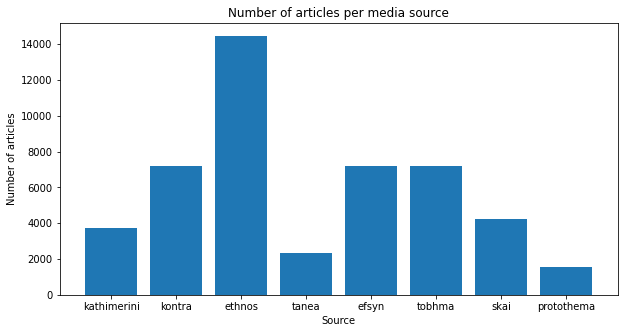

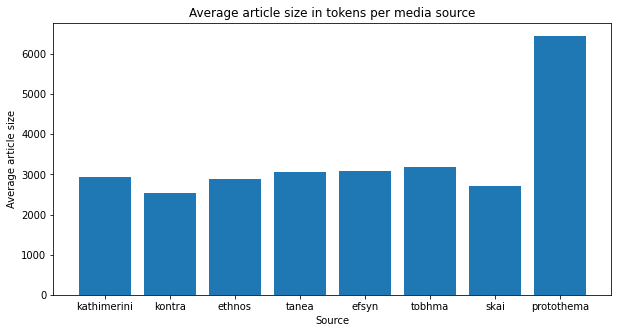

In [6]:
number_of_articles = []
average_article_size = []

for media_source_name in media_sources_articles:
    # drop rows with empty main_text
    media_sources_articles[media_source_name] = media_sources_articles[media_source_name].dropna(subset=['main_text'])
    
    number_of_articles.append(len(media_sources_articles[media_source_name].index))
    average_article_size.append(media_sources_articles[media_source_name]['main_text'].apply(len).mean())

fig = plt.figure(figsize = (10, 5)) 
  
# number of articles per media source
plt.bar(media_sources_articles.keys(), number_of_articles)
plt.title('Number of articles per media source')
plt.ylabel('Number of articles') 
plt.xlabel('Source')  
plt.show()

fig = plt.figure(figsize = (10, 5)) 

# average article size per media source
plt.bar(media_sources_articles.keys(), average_article_size)
plt.title('Average article size in tokens per media source')
plt.ylabel('Average article size') 
plt.xlabel('Source')  
plt.show() 

### Number of articles published per media source in 2020
We do not have articles for every media source in whole 2020 year. We see that there are media sources with higher article publishing rate than other.

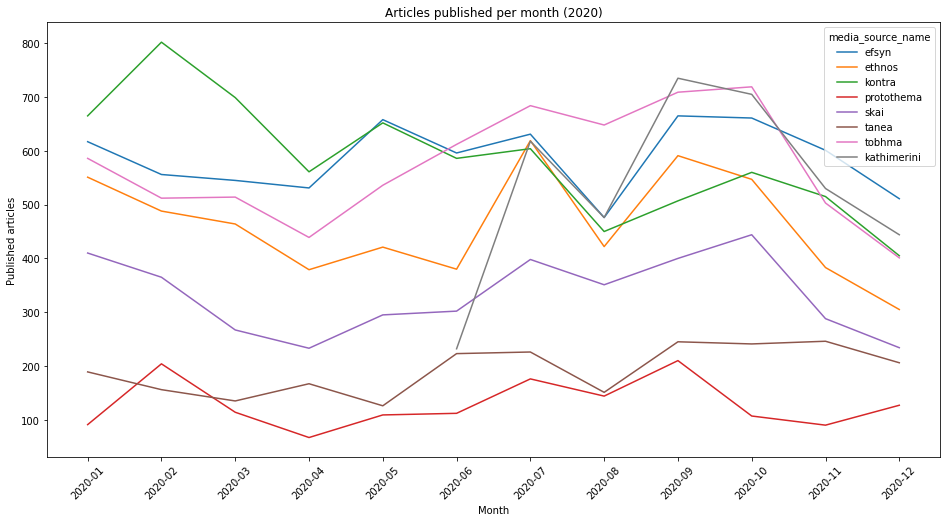

In [7]:
#  add month -->date is set in all articles as yyyy-mm-dd....
merged_articles_df['upload_month'] = merged_articles_df['upload_time'].apply(lambda x: x[:7])

# 2020
count_df = merged_articles_df[['2020' in x for x in merged_articles_df['upload_month']]].groupby(['upload_month', 'media_source_name'])['links'].count().reset_index()
# all
#count_df = merged_articles_df.groupby(['upload_month', 'media_source_name'])['links'].count().reset_index()
count_df.rename(columns={'links':'published_articles'}, inplace=True)

plt.figure(figsize=(16,8))
sns.lineplot(x='upload_month', y='published_articles', data=count_df, hue='media_source_name')
plt.title('Articles published per month (2020)')
plt.ylabel('Published articles') 
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

### Find maximum overlap period
There is a period that we have articles for all media sources we will focus our analysis on those articles

The maximum overlap period that we have articles for all media sources is from 2020-06-19 07:47:07 until 2020-12-23 13:10


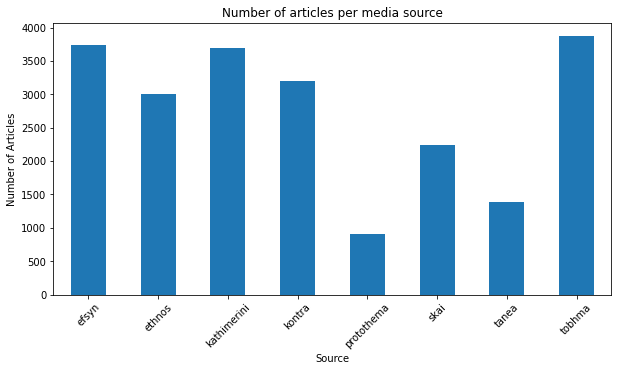

In [8]:
min_date = merged_articles_df.groupby(['media_source_name'])['upload_time'].min().max() 
max_date = merged_articles_df.groupby(['media_source_name'])['upload_time'].max().min()

print('The maximum overlap period that we have articles for all media sources is from {} until {}'.format(min_date, max_date))

# filter out documents to keep only those inside the overlap window
merged_df_overlap_period = merged_articles_df[(merged_articles_df['upload_time'] >= min_date) & (merged_articles_df['upload_time'] <= max_date)]
merged_df_overlap_period = merged_df_overlap_period.dropna(subset=['main_text'])

merged_df_overlap_period.groupby('media_source_name')['main_text'].count().plot.bar(rot=45,
                                                                                    figsize=(10,5),
                                                                                    xlabel='Source',
                                                                                    ylabel='Number of Articles', 
                                                                                    title='Number of articles per media source');

### Word clouds
Word cloud visualizations for the most frequent words coming from the articles of each media source in the maximum overlap period. Because all articles come from Politics category we can see that vocabulary used in the same time period is similar. This fact makes classification tasks difficult.

kathimerini word cloud


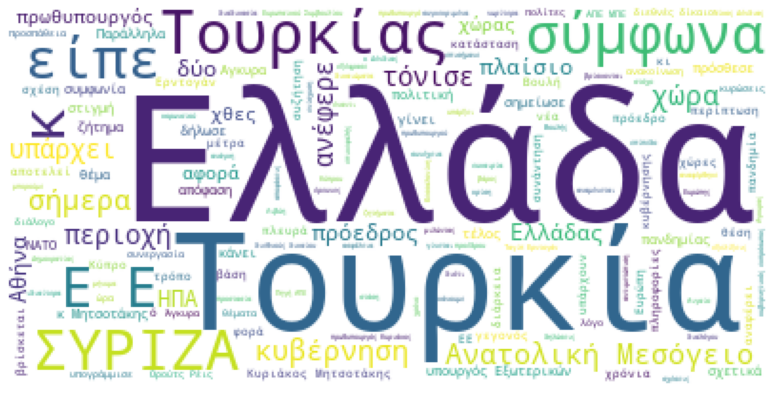

kontra word cloud


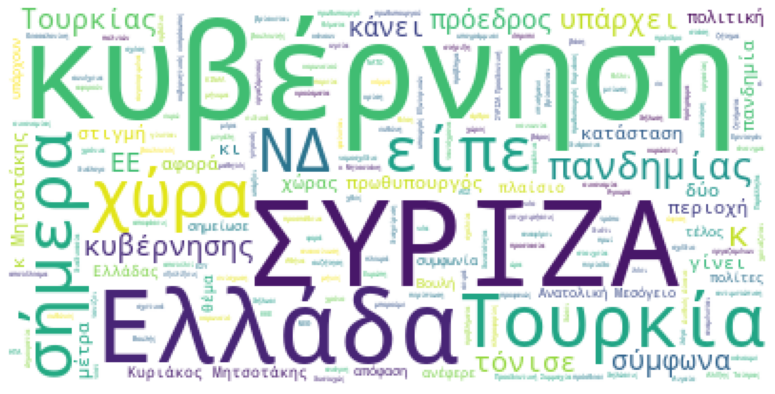

ethnos word cloud


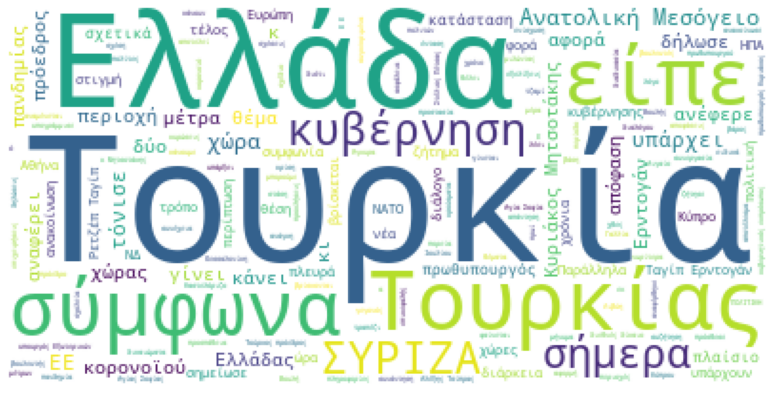

tanea word cloud


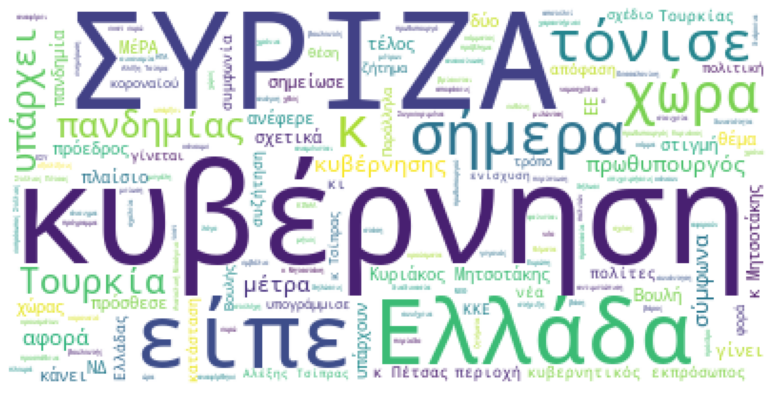

efsyn word cloud


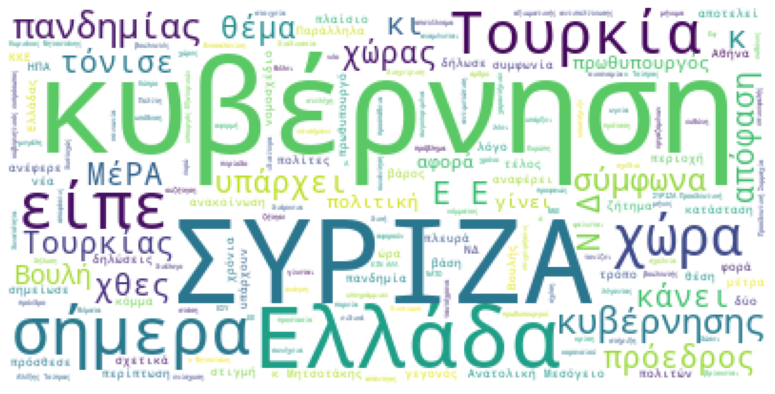

tobhma word cloud


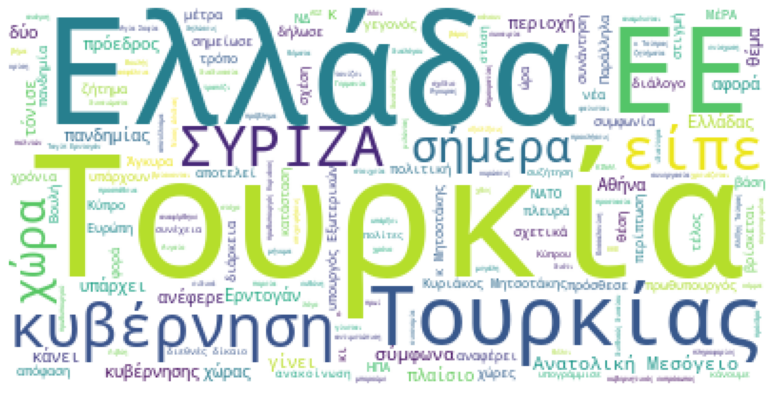

skai word cloud


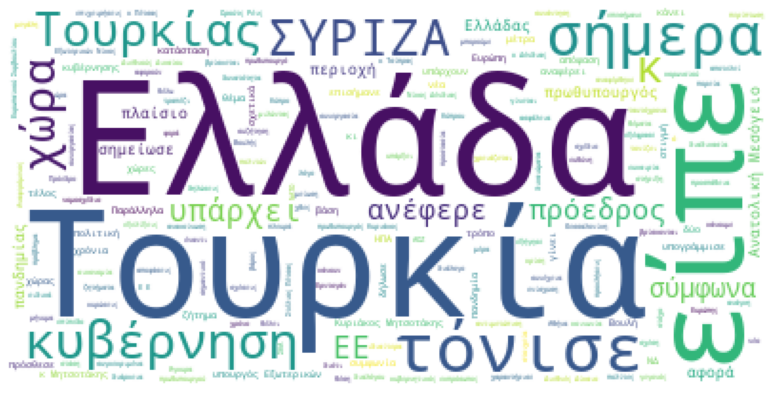

protothema word cloud


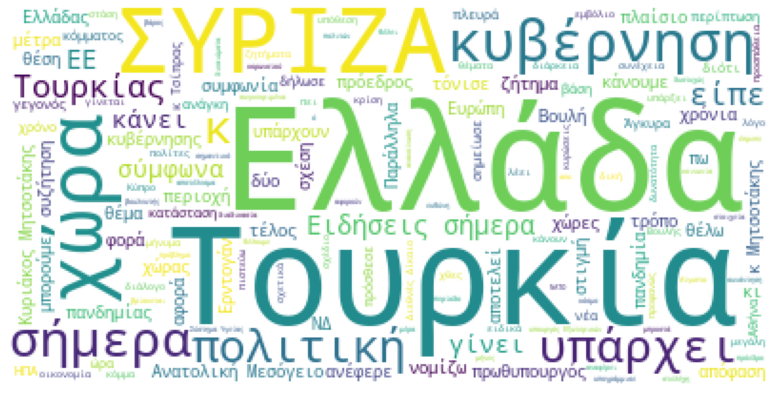

In [9]:
stopwords = load_stop_words()
for media_source_name in media_sources_articles.keys():
    print('{} word cloud'.format(media_source_name))
    combined_text = ' '.join(article for article in merged_df_overlap_period[merged_df_overlap_period['media_source_name'] == media_source_name]['main_text'])
    #combined_text = combined_text.lower()
    # remove non words
    combined_text = re.sub('[^Α-ΩΆΈΌΊΏΉΎΫΪ́α-ωάέόίώήύϊΐϋΰ]', ' ', combined_text)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(combined_text)
    
    plt.figure(figsize=(16,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()